# Decsion Tree with Python
Prediction with some weather data. Here we have our data, which comprises the day, outlook, humidity, and wind conditions. The final column is 'Play,' i.e., can we play outside, which we have to predict.

### Install and Import the necessary liberaries 

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import math

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:

df = pd.read_csv("/content/drive/My Drive/Python-Examples-Prof. salwani/3. Decision Tree /weather forecast.csv", header='infer')
df

,Day,Outlook,Temperature,Humidity,Wind,Play Golf
0,d1,Sunny,Hot,High,Weak,No
1,d2,Sunny,Hot,High,Strong,No
2,d3,Overcast,Hot,High,Weak,Yes
3,d4,Rain,Mild,High,Weak,Yes
4,d5,Rain,Cool,Normal,Weak,Yes
5,d6,Rain,Cool,Normal,Strong,No
6,d7,Overcast,Cool,Normal,Strong,Yes
7,d8,Sunny,Mild,High,Weak,No
8,d9,Sunny,Cool,Normal,Weak,Yes
9,d10,Rain,Mild,Normal,Weak,Yes


## Pre-Processing 
Using encoder to make the data suitable  for traing the model 

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Outlook']=encoder.fit_transform(df['Outlook'])
df['Temperature']=encoder.fit_transform(df['Temperature'])
df['Humidity']=encoder.fit_transform(df['Humidity'])
df['Wind']=encoder.fit_transform(df['Wind'])
df['Play Golf']=encoder.fit_transform(df['Play Golf'])
df

,Day,Outlook,Temperature,Humidity,Wind,Play Golf
0,d1,2,1,0,1,0
1,d2,2,1,0,0,0
2,d3,0,1,0,1,1
3,d4,1,2,0,1,1
4,d5,1,0,1,1,1
5,d6,1,0,1,0,0
6,d7,0,0,1,0,1
7,d8,2,2,0,1,0
8,d9,2,0,1,1,1
9,d10,1,2,1,1,1


See the results when outlook is not over cast 

In [13]:
df[df['Outlook']!=0]

,Day,Outlook,Temperature,Humidity,Wind,Play Golf
0,d1,2,1,0,1,0
1,d2,2,1,0,0,0
3,d4,1,2,0,1,1
4,d5,1,0,1,1,1
5,d6,1,0,1,0,0
7,d8,2,2,0,1,0
8,d9,2,0,1,1,1
9,d10,1,2,1,1,1
10,d11,2,2,1,0,1
13,d14,1,2,0,0,0


# Building a  model

Let's start by splitting our data into a training set and test set 

## Train Test Split

In [14]:
X = df.drop(columns=['Play Golf', 'Day'], axis=1) # Features
y = df['Play Golf'] # Target variable

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=0)


# Create Decision Tree classifer object

In [16]:

clf = DecisionTreeClassifier(criterion='entropy',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=3,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort=False,)

# Train Decision Tree Classifer
clf = clf.fit(X,y)

#Predict the response for test dataset
#y_pred = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


### Visualize the decision Tree 

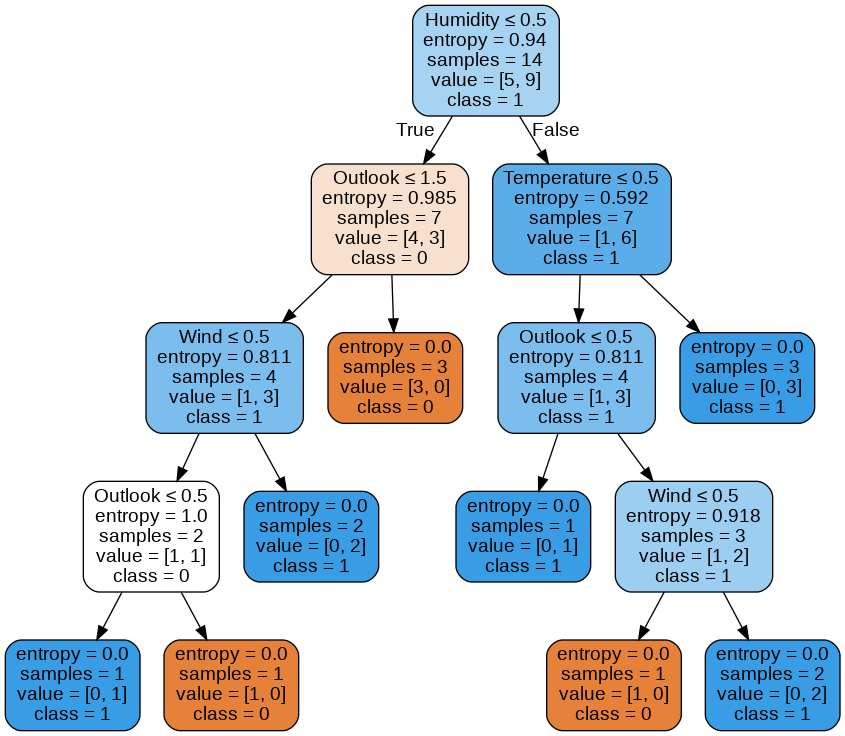

In [17]:
feature_cols=['Outlook', 'Temperature','Humidity','Wind']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('diabetes.png')
Image(graph.create_png())